In [1]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_data(battery):
  mat = loadmat('../data/raw/NASA/' + battery + '.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]
dataset, capacity = load_data('B0007')
pd.set_option('display.max_columns', 10)
print(dataset.head())
dataset.describe()

Total data in dataset:  616
[1, np.uint8(24), datetime.datetime(2008, 4, 2, 15, 25, 41), np.float64(1.89105229539079), np.float64(4.199359521791473), np.float64(-0.0018658918833680202), np.float64(23.93704394613529), np.float64(-0.0004), np.float64(0.0), np.float64(0.0)]
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  1.891052          4.199360   
1      1                   24 2008-04-02 15:25:41  1.891052          4.199497   
2      1                   24 2008-04-02 15:25:41  1.891052          3.985606   
3      1                   24 2008-04-02 15:25:41  1.891052          3.963247   
4      1                   24 2008-04-02 15:25:41  1.891052          3.946647   

   current_measured  temperature_measured  current_load  voltage_load    time  
0         -0.001866             23.937044       -0.0004         0.000   0.000  
1         -0.002139             23.924074       -0.0004         4.215  16.781  
2

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
count,50285.000000,50285.0,50285,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,2008-05-07 01:58:43.570826240,1.632911,3.516153,-1.910982,32.374078,1.471671,2.499169,1546.208924
min,1.000000,24.0,2008-04-02 15:25:41,1.400455,1.737030,-2.006038,22.969923,-2.000000,0.000000,0.000000
25%,50.000000,24.0,2008-04-29 22:00:04,1.497822,3.408859,-1.990432,29.683138,2.000000,2.470000,768.563000
50%,88.000000,24.0,2008-05-07 21:56:09,1.605663,3.520359,-1.989406,32.294479,2.000000,2.582000,1537.031000
75%,127.000000,24.0,2008-05-18 03:05:19,1.785885,3.681617,-1.988328,35.230784,2.000000,2.743000,2305.984000
max,168.000000,24.0,2008-05-27 20:45:42,1.891052,4.233325,0.005072,42.332522,2.000000,4.249000,3690.234000
std,45.699687,0.0,NaN,0.152751,0.268665,0.387120,4.004486,1.294697,0.550780,906.640295


Text(0.5, 1.0, 'Discharge B0005')

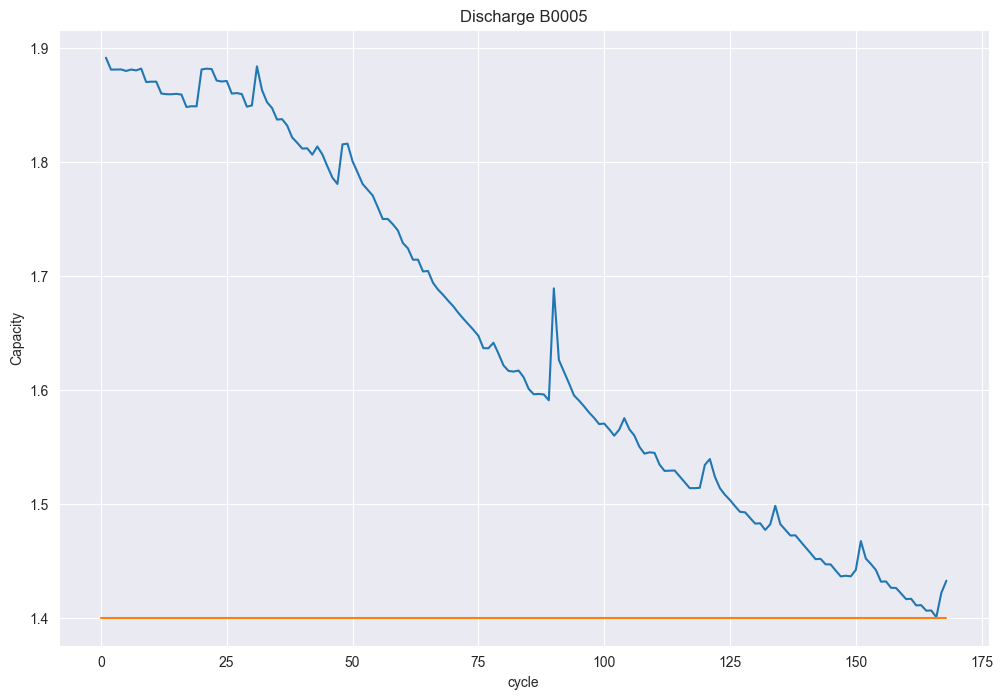

In [4]:
plot_df = capacity.loc[(capacity['cycle']>=1),['cycle','capacity']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['capacity'])
#Draw threshold
plt.plot([0.,len(capacity)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

In [5]:
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity'])/C
print(dis_ele.head(5))

   cycle            datetime  capacity       SoH
0      1 2008-04-02 15:25:41  1.891052  1.000000
1      2 2008-04-02 19:43:48  1.880637  0.994492
2      3 2008-04-03 00:01:06  1.880663  0.994506
3      4 2008-04-03 04:16:37  1.880771  0.994563
4      5 2008-04-03 08:33:25  1.879451  0.993865


Text(0.5, 1.0, 'Discharge B0005')

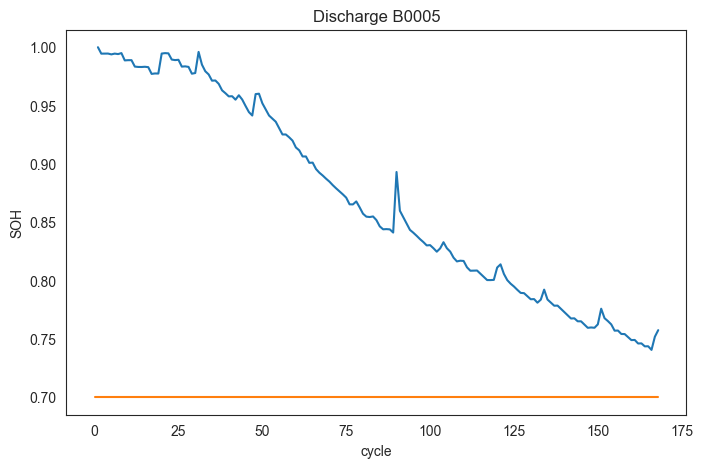

In [6]:
plot_df = dis_ele.loc[(dis_ele['cycle']>=1),['cycle','SoH']]
sns.set_style("white")
plt.figure(figsize=(8, 5))
plt.plot(plot_df['cycle'], plot_df['SoH'])
#Draw threshold
plt.plot([0.,len(capacity)], [0.70, 0.70])
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')